#### Using new categorized salary data of selected companies.
#### edited on 11.16
#### edited on 11.17

## 1.1 What kind of jobs can get the highest salary in the current days?
#### salary range for categories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import seaborn as sns
from scipy import stats
import sys

In [2]:
data = pd.read_csv('./Scraper/SalaryScraper/fulltime_merged_salaries_company_table.csv')

In [3]:
groups = data.groupby('category')
eng = groups.get_group('engineering')
it = groups.get_group('it')
managerial = groups.get_group('managerial')
marketing = groups.get_group('marketing')
others = groups.get_group('others')
sales = groups.get_group('sales')

In [4]:
def salary_of_category(d):
    '''
    for all non-0 input
    return range of this category
    '''
    salary = d[d.salary_range.notnull()]['salary_range']
    s = salary.str.replace('K', '').str.replace('$', '').str.replace('€', '').str.replace("Range: ", '')
    s = s.apply(lambda x: pd.Series(x.split(' - '))) 
    s = s.astype('int')
    return s

In [40]:
# Data frame of low / high salary
ave_eng = (salary_of_category(eng))
ave_it  = (salary_of_category(it))
ave_managerial  = (salary_of_category(managerial))
ave_marketing  = (salary_of_category(marketing))
ave_others  = (salary_of_category(others))
ave_sales  = (salary_of_category(sales))

In [41]:
# low / high average
salary_eng = ave_eng.sum()/len(ave_eng)
salary_it  = ave_it.sum()/len(ave_it)
salary_mana  = ave_managerial.sum()/len(ave_managerial)
salary_mk  = ave_marketing.sum()/len(ave_marketing)
salary_others = ave_others.sum()/len(ave_others)
salary_sales = ave_sales.sum()/len(ave_sales)

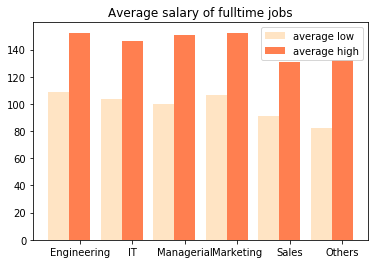

In [42]:
# plot graph
name_list = ['Engineering','IT','Managerial','Marketing', 'Sales', 'Others']
num_list1 = [salary_eng[0],salary_it[0],salary_mana[0],salary_mk[0],salary_others[0],salary_sales[0]]
num_list2 = [salary_eng[1],salary_it[1],salary_mana[1],salary_mk[1],salary_others[1],salary_sales[1]]
x =list(range(len(num_list1)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average low', color = 'bisque')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average high', tick_label = name_list, color = 'coral')
plt.legend()
plt.title('Average salary of fulltime jobs',fontsize='large')
plt.show()

### 1.2 The distribution of salary in each category

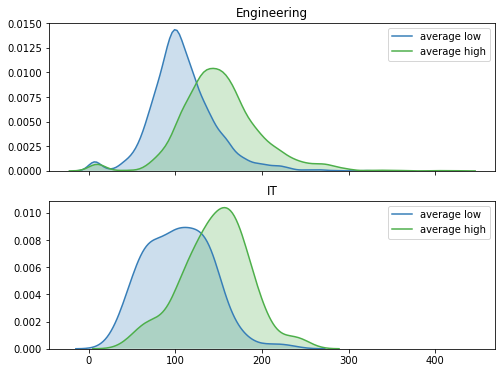

In [63]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_eng[0], label = 'average low', shade=True, color=c2, ax=ax1).set_title('Engineering')
sns.kdeplot(ave_eng[1], label = 'average high',shade=True, color=c3, ax=ax1)
sns.kdeplot(ave_it[0], label = 'average low', shade=True, color=c2, ax=ax2).set_title('IT')
sns.kdeplot(ave_it[1], label = 'average high',shade=True, color=c3, ax=ax2)

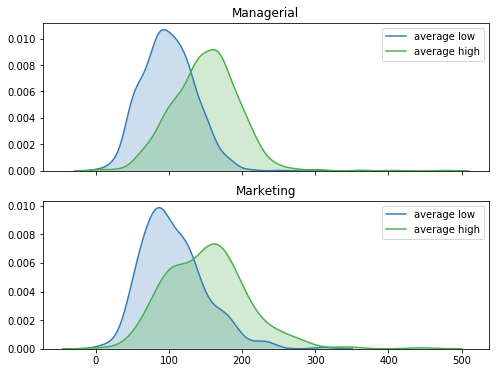

In [64]:
f, (ax3, ax4) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_managerial[0], label = 'average low', shade=True, color=c2, ax=ax3).set_title('Managerial')
sns.kdeplot(ave_managerial[1], label = 'average high',shade=True, color=c3, ax=ax3)
sns.kdeplot(ave_marketing[0], label = 'average low', shade=True, color=c2, ax=ax4).set_title('Marketing')
sns.kdeplot(ave_marketing[1], label = 'average high',shade=True, color=c3, ax=ax4)

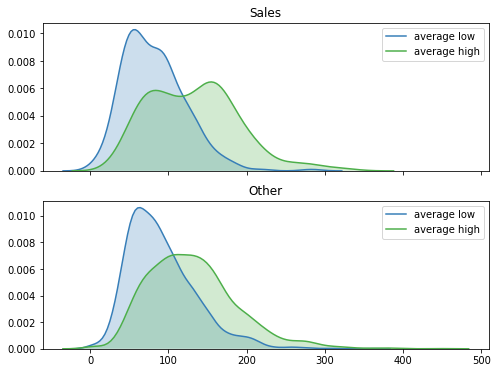

In [65]:
f, (ax3, ax4) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_sales[0], label = 'average low', shade=True, color=c2, ax=ax3).set_title('Sales')
sns.kdeplot(ave_sales[1], label = 'average high',shade=True, color=c3, ax=ax3)
sns.kdeplot(ave_others[0], label = 'average low', shade=True, color=c2, ax=ax4).set_title('Other')
sns.kdeplot(ave_others[1], label = 'average high',shade=True, color=c3, ax=ax4)

### 1.3 What kind of interns get paid more?

In [34]:
data_int = pd.read_csv('./Scraper/SalaryScraper/intern_merged_salaries_company_table.csv')

In [35]:
data_int

,job_title,mean_pay,salary_range,company,category
0,Software Engineer - Hourly Intern,$28/hr,Range: $13 - $42,cisco,engineering
1,Software Engineer() - Hourly Intern,$29/hr,Range: $21 - $43,cisco,engineering
2,Intern - Hourly,$26/hr,Range: $13 - $45,cisco,others
3,Intern - Hourly,$24/hr,Range: $11 - $43,cisco,others
4,IT Engineer - Hourly Intern,$27/hr,Range: $24 - $30,cisco,it
...,...,...,...,...,...
1478,Team Lead - Hourly,$21/hr,Range: $18 - $34,google,others
1479,Receptionist - Hourly,$22/hr,Range: $18 - $23,google,others
1480,Software - Intern,"$86,340/yr",Range: $86K - $87K,google,engineering
1481,Attorney - Hourly Contractor,$50/hr,Range: $48 - $50,google,others


In [36]:
groups2 = data.groupby('category')
eng2 = groups2.get_group('engineering')
it2 = groups2.get_group('it')
managerial2 = groups2.get_group('managerial')
marketing2 = groups2.get_group('marketing')
others2 = groups2.get_group('others')
sales2 = groups2.get_group('sales')

In [37]:
# Data frame of low / high salary
ave_eng2 = (salary_of_category(eng2))
ave_it2  = (salary_of_category(it2))
ave_managerial2  = (salary_of_category(managerial2))
ave_marketing2  = (salary_of_category(marketing2))
ave_others2  = (salary_of_category(others2))
ave_sales2  = (salary_of_category(sales2))
# low / high average
salary_eng2 = ave_eng2.sum()/len(ave_eng2)
salary_it2  = ave_it2.sum()/len(ave_it2)
salary_mana2  = ave_managerial2.sum()/len(ave_managerial2)
salary_mk2  = ave_marketing2.sum()/len(ave_marketing2)
salary_others2 = ave_others2.sum()/len(ave_others2)
salary_sales2 = ave_sales2.sum()/len(ave_sales2)

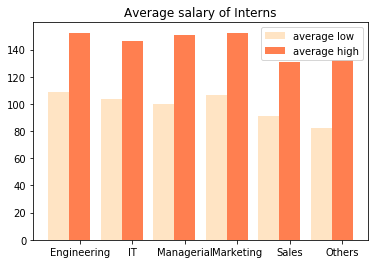

In [38]:
# plot graph
name_list = ['Engineering','IT','Managerial','Marketing', 'Sales', 'Others']
num_list1 = [salary_eng2[0],salary_it2[0],salary_mana2[0],salary_mk2[0],salary_others2[0],salary_sales2[0]]
num_list2 = [salary_eng2[1],salary_it2[1],salary_mana2[1],salary_mk2[1],salary_others2[1],salary_sales2[1]]
x =list(range(len(num_list1)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average low', color = 'bisque')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average high', tick_label = name_list, color = 'coral')
plt.legend()
plt.title('Average salary of Interns',fontsize='large')
plt.show()

## 2. Which company pays more?
### 2.1 Fulltime jobs. 

In [27]:
groups_company = data.groupby('company')
company_names = (list(groups_company.groups.keys()))
num_companies = len(company_names)

In [28]:
def salary_of_company(d):
    '''
    for all non-0 input
    return range of a certain company
    '''
    salary = d[d.salary_range.notnull()]['salary_range']
    s = salary.str.replace('K', '').str.replace('$', '').str.replace('€', '').str.replace('£', '').str.replace("Range: ", '')
    s = s.apply(lambda x: pd.Series(x.split(' - '))) 
    s = s.astype('int')
    ave = s.sum()/len(s)
    return s, ave

In [29]:
average = []
salary_of_companies = []
for i in range (num_companies):
    company = company_names[i]
    com = groups_company.get_group(company)
    s, ave = salary_of_company(com)
    salary_of_companies.append(s)
    average.append(ave)

In [30]:
outcome = zip(company_names, salary_of_companies, average)

outcome = (list(outcome))

outcome = sorted(outcome, key = lambda x: x[2][1], reverse = True)

In [31]:
name_list = []
num_list1 = []
num_list2 = []
for j in range (num_companies):
    name_list.append(outcome[j][0])
    num_list2.append(outcome[j][2][0])
    num_list1.append(outcome[j][2][1])

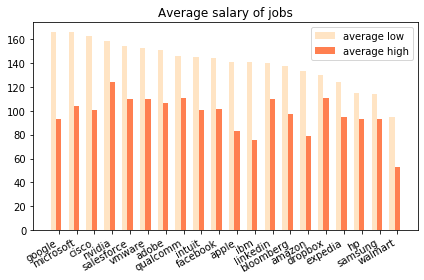

In [32]:
# plot graph
fig, ax = plt.subplots()
x =list(range(len(num_list1)))
total_width, n = 0.6, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average low', color = 'bisque')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average high', tick_label = name_list, color = 'coral')
plt.legend()
plt.title('Average salary of jobs',fontsize='large')
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

### 2.2 Which company pays more to intern jobs?

In [16]:
groups_company_int = data_int.groupby('company')
company_names_int = (list(groups_company_int.groups.keys()))
num_companies_int = len(company_names_int)

In [19]:
average_int = []
salary_of_companies_int = []
for i in range (num_companies_int):
    company = company_names_int[i]
    com = groups_company_int.get_group(company)
    s, ave = salary_of_company(com)
    salary_of_companies_int.append(s)
    average_int.append(ave)

In [24]:
outcome1 = zip(company_names_int, salary_of_companies_int, average_int)

outcome1 = (list(outcome1))

outcome1 = sorted(outcome1, key = lambda x: x[2][1], reverse = True)
name_list_int = []
num_list1 = []
num_list2 = []
for j in range (num_companies_int):
    name_list_int.append(outcome1[j][0])
    num_list2.append(outcome1[j][2][0])
    num_list1.append(outcome1[j][2][1])

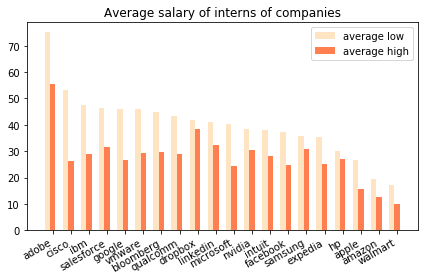

In [25]:
# plot graph
fig, ax = plt.subplots()
x =list(range(len(num_list1)))
total_width, n = 0.6, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average low', color = 'bisque')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average high', tick_label = name_list_int, color = 'coral')
plt.legend()
plt.title('Average salary of interns of companies',fontsize='large')
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

## 2. What is the distribution of job opportunities among different categories?

In [45]:
len(eng.groupby('job_title').groups)

1063

In [55]:
def num_of_jobs(data):
    lengths = []
    for category in data.groupby('category').groups:
        n = data.groupby('category').get_group(category)
        lengths.append([category,len(n.groupby('job_title').groups)])
    return lengths

In [56]:
numbers = num_of_jobs(data)

In [57]:
numbers

[['engineering', 1063],
 ['it', 80],
 ['managerial', 538],
 ['marketing', 140],
 ['others', 1347],
 ['sales', 151]]